# Udacity Data Analyst Nanodegree
## P2: Investigate a Dataset
#### Author: David Venturi
#### Date: May 2, 2016

## Background Information

**What is a balk?** [Pro Baseball Insider](http://probaseballinsider.com/baseball-instruction/what-is-a-balk/) has the simplest definition:
> In the simplest sense, a balk is when the pitcher tries to intentionally deceive the hitter or runner.  It can be a flinch on the mound after the pitcher gets set, a deceptive pick off attempt, or even just as simple as dropping the ball once you become set.  There are many actions that can result in a balk.  When runners are on base and a balk is called, all the runners move up one base.

A full list of the actions that consitute a balk can be found [here](https://en.wikipedia.org/wiki/Balk#Balk_actions).

**Balks are rare.** Since 2000, there have only been 100-200 balks per season, which is roughly one every 12 to 24 games in a full 2430-game season.

**Balks are difficult to spot.** They sometimes go unnoticed. What consitutes a balk might be subjective depending on the umpire. They might even be ignored by umpires depending on the situation.

**The definition of a balk has changed over time.** Throughout baseball history, there have been a number of tweaks to the balk rule. With each tweak, balk totals for the subsequent season tended to spike or dip.

## Questions for Investigation

How

## Dataset

The 2015 version of The Lahman Baseball Database contains complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. The *Master* (player names, DOB, and biographical info), *Pitching* (pitching statistics), and *PitchingPost* (post-season pitching statistics) tables are required for this balk analysis.

The [full database](http://www.seanlahman.com/baseball-archive/statistics/) and a [detailed description](http://seanlahman.com/files/database/readme2014.txt) of its contents can be found on Sean Lahman's website.

In [286]:
import pandas as pd
# import os
# script_dir = os.path.dirname(__file__) #<-- absolute dir the script is in
# rel_path = '/baseballdatabank-master/core/Pitching.csv'
# abs_file_path = os.path.join(script_dir, rel_path)

master_df = pd.read_csv('../p2/baseballdatabank-master/core/Master.csv')
pitching_df = pd.read_csv('../p2/baseballdatabank-master/core/Pitching.csv')
pitchingpost_df = pd.read_csv('../p2/baseballdatabank-master/core/PitchingPost.csv')
batting_df = pd.read_csv('../p2/baseballdatabank-master/core/Batting.csv')
# battingpost_df = pd.read_csv('../p2/baseballdatabank-master/core/BattingPost.csv')

Populating the interactive namespace from numpy and matplotlib


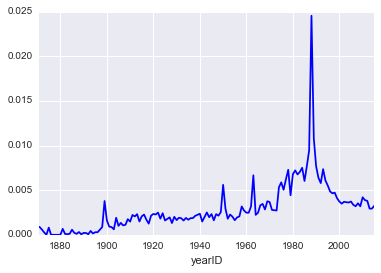

In [287]:
# master_df.head()
# pitching_df.head()
# pitchingpost_df.head()
balks_by_year = pitching_df.groupby('yearID')['BK'].sum()
ipouts_by_year = (pitching_df.groupby('yearID')['IPouts'].sum()) / 3 # convert to IP
balks_ipouts_by_year = balks_by_year / ipouts_by_year

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

balks_ipouts_by_year.plot(color='b')

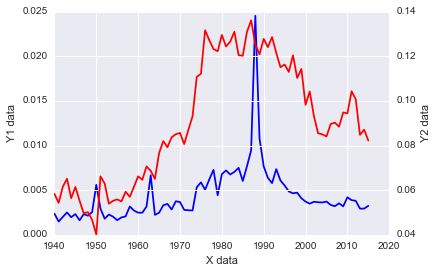

In [288]:
sb_by_year = batting_df.groupby('yearID')['SB'].sum()
cs_by_year = batting_df.groupby('yearID')['CS'].sum()
sb_attempts_by_year = sb_by_year + cs_by_year
sb_attempts_ipouts_by_year = sb_attempts_by_year / ipouts_by_year

# sb_attempts_ipouts_by_year.plot()
# balks_ipouts_by_year.plot()
# print balks_ipouts_by_year.values

x = balks_ipouts_by_year.loc['1940':'2015'].index.get_level_values('yearID')
y1 = balks_ipouts_by_year.loc['1940':'2015'].values
y2 = sb_attempts_ipouts_by_year.loc['1940':'2015'].values

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, color='b')
ax2.plot(x, y2, color='r')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data')
ax2.set_ylabel('Y2 data')

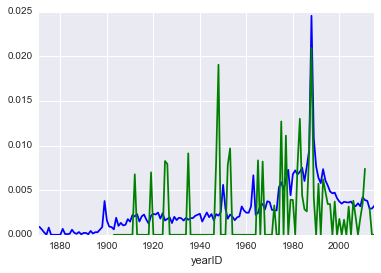

In [289]:
playoff_balks_by_year = pitchingpost_df.groupby('yearID')['BK'].sum()
playoff_ipouts_by_year = (pitchingpost_df.groupby('yearID')['IPouts'].sum()) / 3 # convert to IP
playoff_balks_ipouts_by_year = playoff_balks_by_year / playoff_ipouts_by_year

balks_ipouts_by_year.plot(color='b')
playoff_balks_ipouts_by_year.plot(color='g')

In [290]:
# Excludes NA/null values
season_mean = balks_ipouts_by_year.mean()
season_std = balks_ipouts_by_year.std(ddof=1) # data missing from population
season_n = balks_ipouts_by_year.size

playoff_mean = playoff_balks_ipouts_by_year.mean()
playoff_std = playoff_balks_ipouts_by_year.std(ddof=1) # data missing from population
playoff_n = playoff_balks_ipouts_by_year.size

unpooled_se = (((season_std ** 2) / season_n) + ((playoff_std ** 2) / playoff_n)) ** (0.5)
print unpooled_se

t = (season_mean - playoff_mean) / unpooled_se
print t

num_df = (((season_std ** 2) / season_n) + ((playoff_std ** 2) / playoff_n)) ** 2
denom_df = ((1 / (season_n - 1.)) * (((season_std ** 2) / season_n) ** 2)) + \
            ((1 / (playoff_n - 1.)) * (((playoff_std ** 2) / playoff_n) ** 2))
df = num_df / denom_df
print df # confirmed here http://web.utk.edu/~cwiek/TwoSampleDoF

p = 0.094 # P(T > 1.3207889894) using https://surfstat.anu.edu.au/surfstat-home/tables/t.php

0.000440407293665
1.3207889894
202.847548527


Null hypothesis: μ sub (regular season balks/ipouts - playoff balks/ipouts) <= 0

Alt hypothesis: μ sub (regular season balks/ipouts - playoff balks/ipouts) > 0

Process for t-test here: https://onlinecourses.science.psu.edu/stat200/node/60

In [294]:
balks_by_pitcher = pitching_df.groupby('playerID')['BK'].sum()
ipouts_by_pitcher = (pitching_df.groupby('playerID')['IPouts'].sum()) / 3 # convert to IP
balks_ipouts_by_pitcher = balks_by_player / ipouts_by_player

# balks_by_pitcher.sort_values(ascending=False, inplace=True)

balks_ipouts_by_pitcher.rename('BK/IP', inplace=True)

player_name_id = master_df[['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame']]

alltime_balk_king = player_name_id.join(balks_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(ipouts_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(balks_ipouts_by_pitcher, on='playerID', how='inner').sort_values('BK/IP', ascending=False)
alltime_balk_king = alltime_balk_king.loc[alltime_balk_king['IPouts'] > 50]

modern_balk_king = alltime_balk_king.loc[alltime_balk_king['debut'] > '2000-01-01']
modern_balk_king

balk_iron_man = alltime_balk_king.loc[(alltime_balk_king['BK'] == 0) & (alltime_balk_king['debut'] > '1950-01-01')].sort_values('IPouts', ascending=False)
balk_iron_man

,playerID,nameFirst,nameLast,debut,finalGame,BK,IPouts,BK/IP
14750,rueteki01,Kirk,Rueter,1993-07-07,2005-07-29,0,1918.000000,0.0
8591,jonessa02,Sam,Jones,1951-09-22,1964-10-03,0,1643.333333,0.0
11612,miltoer01,Eric,Milton,1998-04-05,2009-06-27,0,1582.333333,0.0
9534,larsedo01,Don,Larsen,1953-04-18,1967-07-07,0,1548.000000,0.0
1839,breweto01,Tom,Brewer,1954-04-18,1961-09-27,0,1509.333333,0.0
6857,halldi01,Dick,Hall,1952-04-15,1971-09-25,0,1259.666667,0.0
9863,lindbpa01,Paul,Lindblad,1965-09-15,1978-10-01,0,1213.666667,0.0
1301,billich01,Chad,Billingsley,2006-06-15,2015-07-18,0,1212.333333,0.0
10901,mccatst01,Steve,McCatty,1977-09-17,1985-09-25,0,1188.333333,0.0
17161,travebi01,Bill,Travers,1974-05-19,1983-07-17,0,1120.666667,0.0
